# Ans1-

mathematical formula for a linear svm is:

f(x)=sign(w.x+b)

w is the weight vector

x is the input vector 

b is the bias

sign is the sign function indicating the class prediction

# Ans2-

The objective function of the linear svm to minimize the margin between different classes.

# Ans3-

The kernal trick in svm involves emplicitly mapping input data into a higher dimension space allowing non linear decision boundries to be represented in the original feature spaces.

# Ans4-

Support vectors in SVM are the data points that determine the optimal hyperplane; they are crucial for defining the decision boundary, and their positions influence the classifier. Example: In a binary classification with two classes, support vectors are the data points closest to the decision boundary.

# Ans5-

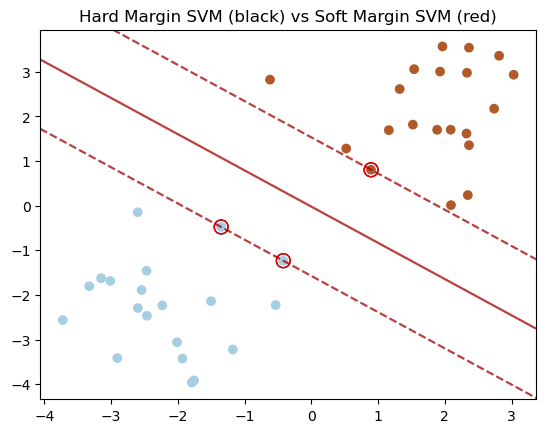

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generating a sample dataset
np.random.seed(42)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [-1] * 20 + [1] * 20

# Creating a hard margin SVM model
clf_hard = svm.SVC(kernel='linear', C=1e6)  # You can use a large finite value instead of inf
clf_hard.fit(X, y)

# Creating a soft margin SVM model
clf_soft = svm.SVC(kernel='linear', C=1)
clf_soft.fit(X, y)

# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plotting the decision boundary and margins for hard margin SVM
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf_hard.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plotting the decision boundary and margins for soft margin SVM
Z_soft = clf_soft.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_soft = Z_soft.reshape(xx.shape)

plt.contour(xx, yy, Z_soft, colors='r', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plotting support vectors
plt.scatter(clf_hard.support_vectors_[:, 0], clf_hard.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.scatter(clf_soft.support_vectors_[:, 0], clf_soft.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='r')

plt.title('Hard Margin SVM (black) vs Soft Margin SVM (red)')
plt.show()


 # Ans6-

Accuracy: 0.90


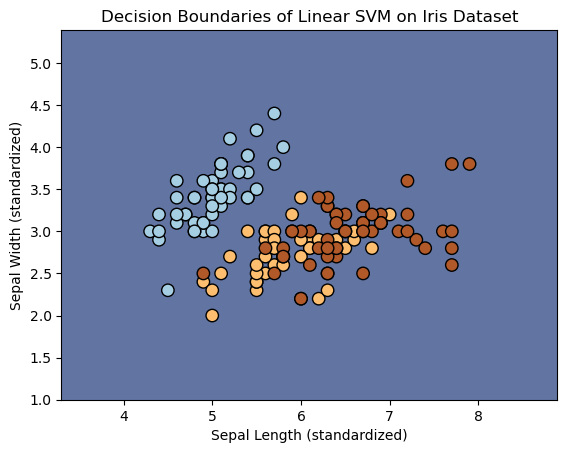

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Taking only the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a linear SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict labels for the testing set
y_pred = clf.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, linewidth=1, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.title('Decision Boundaries of Linear SVM on Iris Dataset')
plt.show()
